In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")


In [4]:
df_train=pd.read_csv('data/train.csv')
df_test=pd.read_csv('data/test.csv')
print("df_train:",df_train.shape)
print("df_test:",df_test.shape)

df_train: (59381, 128)
df_test: (19765, 127)


In [5]:
df_com=pd.concat([df_train,df_test],axis=0,ignore_index=True)
print(df_com.shape)
df_com.head()

(79146, 128)


,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,Family_Hist_1,Family_Hist_2,Family_Hist_3,...,Medical_Keyword_9,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Response,Wt
0,0.323008,0.028,12,1,0.0,3,NaN,2,NaN,0.598039,...,0,1,D3,10,0.076923,2,1,1,8.0,0.148536
1,0.272288,0.000,1,3,0.0,2,0.0018,2,0.188406,NaN,...,0,1,A1,26,0.076923,2,3,1,4.0,0.131799
2,0.428780,0.030,9,1,0.0,2,0.0300,3,0.304348,NaN,...,0,1,E1,26,0.076923,2,3,1,8.0,0.288703
3,0.352438,0.042,9,1,0.0,3,0.2000,3,0.420290,NaN,...,0,1,D4,10,0.487179,2,3,1,8.0,0.205021
4,0.424046,0.027,9,1,0.0,2,0.0500,2,0.463768,NaN,...,0,1,D2,26,0.230769,2,3,1,8.0,0.234310


In [6]:
df=df_com.drop('Response',axis=1)

In [7]:
df.shape

(79146, 127)

In [8]:
df.head(5)

,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,Family_Hist_1,Family_Hist_2,Family_Hist_3,...,Medical_Keyword_8,Medical_Keyword_9,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Wt
0,0.323008,0.028,12,1,0.0,3,NaN,2,NaN,0.598039,...,0,0,1,D3,10,0.076923,2,1,1,0.148536
1,0.272288,0.000,1,3,0.0,2,0.0018,2,0.188406,NaN,...,0,0,1,A1,26,0.076923,2,3,1,0.131799
2,0.428780,0.030,9,1,0.0,2,0.0300,3,0.304348,NaN,...,0,0,1,E1,26,0.076923,2,3,1,0.288703
3,0.352438,0.042,9,1,0.0,3,0.2000,3,0.420290,NaN,...,0,0,1,D4,10,0.487179,2,3,1,0.205021
4,0.424046,0.027,9,1,0.0,2,0.0500,2,0.463768,NaN,...,0,0,1,D2,26,0.230769,2,3,1,0.234310


# EDA

In [9]:
df.isnull().sum()*100/df.shape[0]

BMI                     0.000000
Employment_Info_1       0.027797
Employment_Info_2       0.000000
Employment_Info_3       0.000000
Employment_Info_4      11.265257
Employment_Info_5       0.000000
Employment_Info_6      18.498724
Family_Hist_1           0.000000
Family_Hist_2          48.689763
Family_Hist_3          57.242312
Family_Hist_4          32.675056
Family_Hist_5          70.041442
Ht                      0.000000
Id                      0.000000
Ins_Age                 0.000000
Insurance_History_1     0.000000
Insurance_History_2     0.000000
Insurance_History_3     0.000000
Insurance_History_4     0.000000
Insurance_History_5    42.328102
Insurance_History_7     0.000000
Insurance_History_8     0.000000
Insurance_History_9     0.000000
InsuredInfo_1           0.000000
InsuredInfo_2           0.000000
InsuredInfo_3           0.000000
InsuredInfo_4           0.000000
InsuredInfo_5           0.000000
InsuredInfo_6           0.000000
InsuredInfo_7           0.000000
          

In [10]:
null_columns=df.columns[df.isnull().any()]
X=df[null_columns].isnull().sum()*100/df.shape[0]

In [11]:
missing=pd.DataFrame(X)

In [12]:
missing.rename(columns={'index':'null_columns',0:'missing_percent'},inplace=True)

In [13]:
missing=missing.sort_values("missing_percent",ascending=False)

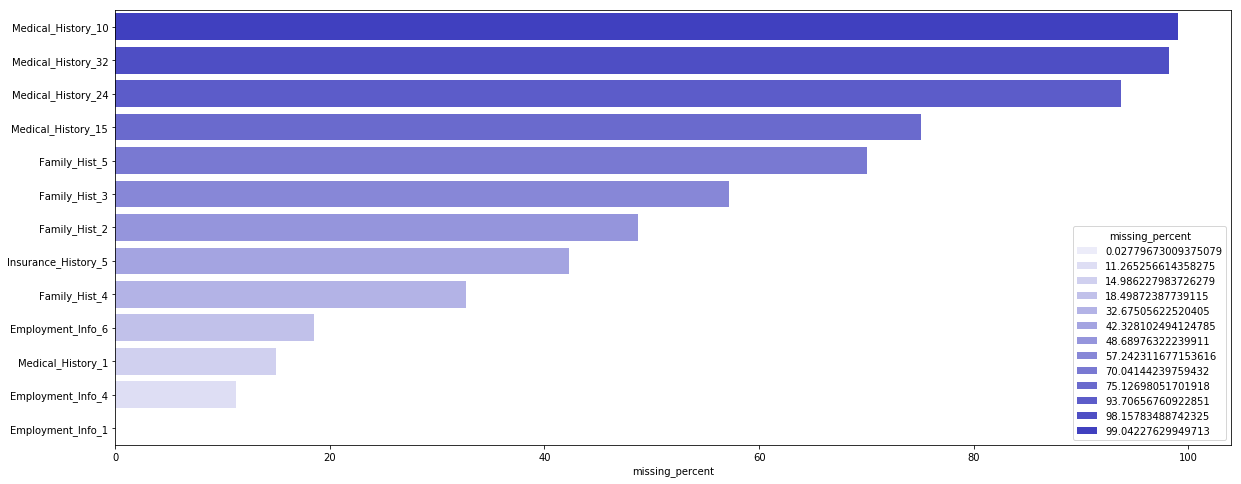

In [14]:
plt.figure(figsize=(20,8))
sns.barplot(x=missing['missing_percent'],y=missing.index,color='blue',hue=missing['missing_percent'],saturation=.5,dodge=False)
plt.show()

In [15]:
fif=missing[missing['missing_percent']>10].index
fif

Index(['Medical_History_10', 'Medical_History_32', 'Medical_History_24',
       'Medical_History_15', 'Family_Hist_5', 'Family_Hist_3', 'Family_Hist_2',
       'Insurance_History_5', 'Family_Hist_4', 'Employment_Info_6',
       'Medical_History_1', 'Employment_Info_4'],
      dtype='object')

In [16]:
df1=df.drop(fif,axis=1) # dropping the columns

In [17]:
na_columns=missing[missing['missing_percent']<10].index
na_columns

Index(['Employment_Info_1'], dtype='object')

In [18]:
print("shape after dropping Missing columns:",df1.shape)

shape after dropping Missing columns: (79146, 115)


In [19]:
null_columns=df1.columns[df1.isnull().any()]
df1[null_columns].isnull().sum()*100/df1.shape[0]

Employment_Info_1    0.027797
dtype: float64

In [20]:
df1['Employment_Info_1'].median()

0.06

In [21]:
df1['Employment_Info_1']=df1['Employment_Info_1'].fillna(df1['Employment_Info_1'].median())
#df1['Employment_Info_4']=df1['Employment_Info_4'].fillna(df1['Employment_Info_4'].median())
#df1['Employment_Info_6']=df1['Employment_Info_6'].fillna(df1['Employment_Info_6'].median())

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79146 entries, 0 to 79145
Columns: 115 entries, BMI to Wt
dtypes: float64(6), int64(108), object(1)
memory usage: 69.4+ MB


In [23]:
df1.columns[df1.isnull().any()==True] # all the null values has been Removed.

Index([], dtype='object')

In [24]:
df1['Product_Info_2'].value_counts().sort_index(ascending=True)

A1     3219
A2     3072
A3     1564
A4      263
A5     1009
A6     2733
A7     1823
A8     9140
B1       85
B2     1446
C1      377
C2      197
C3      437
C4      291
D1     8611
D2     8344
D3    18753
D4    14071
E1     3711
Name: Product_Info_2, dtype: int64

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le=LabelEncoder()
df1['Product_Info_2']=le.fit_transform(df1['Product_Info_2'])

In [27]:
df1['Product_Info_2'].value_counts().sort_index(ascending=True)

0      3219
1      3072
2      1564
3       263
4      1009
5      2733
6      1823
7      9140
8        85
9      1446
10      377
11      197
12      437
13      291
14     8611
15     8344
16    18753
17    14071
18     3711
Name: Product_Info_2, dtype: int64

In [28]:
df1.head()

,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_5,Family_Hist_1,Ht,Id,Ins_Age,Insurance_History_1,...,Medical_Keyword_8,Medical_Keyword_9,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Wt
0,0.323008,0.028,12,1,3,2,0.581818,2,0.641791,1,...,0,0,1,16,10,0.076923,2,1,1,0.148536
1,0.272288,0.000,1,3,2,2,0.600000,5,0.059701,2,...,0,0,1,0,26,0.076923,2,3,1,0.131799
2,0.428780,0.030,9,1,2,3,0.745455,6,0.029851,2,...,0,0,1,18,26,0.076923,2,3,1,0.288703
3,0.352438,0.042,9,1,3,3,0.672727,7,0.164179,2,...,0,0,1,17,10,0.487179,2,3,1,0.205021
4,0.424046,0.027,9,1,2,2,0.654545,8,0.417910,2,...,0,0,1,15,26,0.230769,2,3,1,0.234310


In [29]:
df1.shape

(79146, 115)

encoded=df1.loc[:,'Medical_Keyword_1':'Medical_Keyword_48']
encoded_data=encoded.values

def decode(datum):
    return np.argmax(datum)
decoded=[]

for i in range(encoded_data.shape[0]):
    datum = encoded_data[i]
    print('index: %d' % i)
    print('encoded datum: %s' % datum)
    decoded_datum = decode(encoded_data[i])
    decoded.append(decoded_datum)
    print('decoded datum: %s' % decoded_datum)
    print(decoded_datum)

In [31]:
dec=pd.DataFrame(decoded)

In [32]:
dec[0].value_counts().sort_index()

0     35618
1      2550
2      4100
3       573
4       388
5       483
6     11728
7       495
8       473
9       304
10      325
11      334
12      324
13      671
14     1249
15     4794
16      476
17     2211
18      447
19      219
20      384
21      337
22     1155
23      856
24      257
25      674
26      520
27      567
28      203
29      216
30     1640
31       91
32      417
33      370
34     1248
35      185
36      855
37      113
38      127
39      327
40       50
41      209
42      583
Name: 0, dtype: int64

In [33]:
dec.columns=['Medical_Keyword']

In [34]:
Medical_Key=df1.loc[:,'Medical_Keyword_1':'Medical_Keyword_48'] #slicing the Medical Keyword for deleting from the dataframe.
Medical_Key.head()

,Medical_Keyword_1,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,...,Medical_Keyword_4,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df2=df1.drop(Medical_Key.columns,axis=1) # dropping the Medical_Keywords attributes.
print(df2.shape)
df2.head()

(79146, 72)


,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_5,Family_Hist_1,Ht,Id,Ins_Age,Insurance_History_1,...,Medical_Keyword_8,Medical_Keyword_9,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Wt
0,0.323008,0.028,12,1,3,2,0.581818,2,0.641791,1,...,0,0,1,16,10,0.076923,2,1,1,0.148536
1,0.272288,0.000,1,3,2,2,0.600000,5,0.059701,2,...,0,0,1,0,26,0.076923,2,3,1,0.131799
2,0.428780,0.030,9,1,2,3,0.745455,6,0.029851,2,...,0,0,1,18,26,0.076923,2,3,1,0.288703
3,0.352438,0.042,9,1,3,3,0.672727,7,0.164179,2,...,0,0,1,17,10,0.487179,2,3,1,0.205021
4,0.424046,0.027,9,1,2,2,0.654545,8,0.417910,2,...,0,0,1,15,26,0.230769,2,3,1,0.234310


In [36]:
df=pd.concat([df2,dec],sort=False,axis=1) #concatinating the decoded medical keyword labels to the dataframe.
print(df.shape)
df.head()

(79146, 73)


,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_5,Family_Hist_1,Ht,Id,Ins_Age,Insurance_History_1,...,Medical_Keyword_9,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Wt,Medical_Keyword
0,0.323008,0.028,12,1,3,2,0.581818,2,0.641791,1,...,0,1,16,10,0.076923,2,1,1,0.148536,0
1,0.272288,0.000,1,3,2,2,0.600000,5,0.059701,2,...,0,1,0,26,0.076923,2,3,1,0.131799,0
2,0.428780,0.030,9,1,2,3,0.745455,6,0.029851,2,...,0,1,18,26,0.076923,2,3,1,0.288703,0
3,0.352438,0.042,9,1,3,3,0.672727,7,0.164179,2,...,0,1,17,10,0.487179,2,3,1,0.205021,25
4,0.424046,0.027,9,1,2,2,0.654545,8,0.417910,2,...,0,1,15,26,0.230769,2,3,1,0.234310,0


In [37]:
df.shape

(79146, 73)

In [38]:
df1=df[0:59381]
df1.shape

(59381, 73)

In [39]:
df1['Response']=df_train['Response']

In [40]:
df1.shape

(59381, 74)

In [41]:
df_test1=df[59381:]
df_test1.shape

(19765, 73)

In [42]:
c=df1.columns[df1.dtypes=='float64']
continous=df1[c]
continous['Response']=df1['Response']

In [43]:
continous.head()

,BMI,Employment_Info_1,Ht,Ins_Age,Product_Info_4,Wt,Response
0,0.323008,0.028,0.581818,0.641791,0.076923,0.148536,8
1,0.272288,0.000,0.600000,0.059701,0.076923,0.131799,4
2,0.428780,0.030,0.745455,0.029851,0.076923,0.288703,8
3,0.352438,0.042,0.672727,0.164179,0.487179,0.205021,8
4,0.424046,0.027,0.654545,0.417910,0.230769,0.234310,8


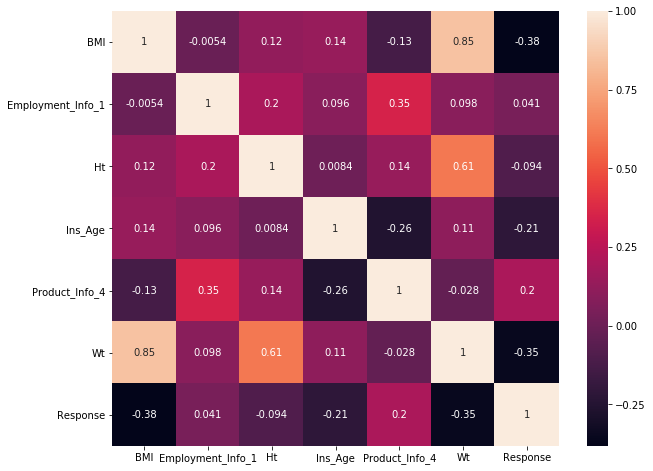

In [44]:
plt.figure(figsize=(10,8))
sns.heatmap(continous.corr(),annot=True)
plt.show()

**There are no dependencies between Response(dependent) and Independent variables(which are continous).**<br>

**There is a high collinearity between independent varibales (BMI and Weight), But we are considering it for analysis without removing.**

In [45]:
discrete=df1.drop(c,axis=1)
discrete.head()

,Employment_Info_2,Employment_Info_3,Employment_Info_5,Family_Hist_1,Id,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_7,...,Medical_Keyword_8,Medical_Keyword_9,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_5,Product_Info_6,Product_Info_7,Medical_Keyword,Response
0,12,1,3,2,2,1,1,3,1,1,...,0,0,1,16,10,2,1,1,0,8
1,1,3,2,2,5,2,1,3,1,1,...,0,0,1,0,26,2,3,1,0,4
2,9,1,2,3,6,2,1,1,3,3,...,0,0,1,18,26,2,3,1,0,8
3,9,1,3,3,7,2,1,1,3,3,...,0,0,1,17,10,2,3,1,25,8
4,9,1,2,2,8,2,1,1,3,3,...,0,0,1,15,26,2,3,1,0,8


In [46]:
discrete.shape

(59381, 68)

# Checking Feature Importance using Chi-Square test of Independence

In [47]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT IMPORTANT predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)


In [48]:
#Initialize ChiSquare Class
cT = ChiSquare(df1)

#Feature Selection
testColumns = discrete.columns
for var in testColumns:
    cT.TestIndependence(colX=var,colY="Response" )

Employment_Info_2 is IMPORTANT for Prediction
Employment_Info_3 is IMPORTANT for Prediction
Employment_Info_5 is IMPORTANT for Prediction
Family_Hist_1 is IMPORTANT for Prediction
Id is NOT IMPORTANT predictor. (Discard Id from model)
Insurance_History_1 is IMPORTANT for Prediction
Insurance_History_2 is IMPORTANT for Prediction
Insurance_History_3 is IMPORTANT for Prediction
Insurance_History_4 is IMPORTANT for Prediction
Insurance_History_7 is IMPORTANT for Prediction
Insurance_History_8 is IMPORTANT for Prediction
Insurance_History_9 is IMPORTANT for Prediction
InsuredInfo_1 is IMPORTANT for Prediction
InsuredInfo_2 is IMPORTANT for Prediction
InsuredInfo_3 is IMPORTANT for Prediction
InsuredInfo_4 is IMPORTANT for Prediction
InsuredInfo_5 is IMPORTANT for Prediction
InsuredInfo_6 is IMPORTANT for Prediction
InsuredInfo_7 is IMPORTANT for Prediction
Medical_History_11 is IMPORTANT for Prediction
Medical_History_12 is IMPORTANT for Prediction
Medical_History_13 is IMPORTANT for Predi

In [49]:
x1=df1.drop(['Response'],axis=1)
y1=df1['Response']

# Modelling

In [50]:
import pandas as pd
import numpy as np
#to handle data in form of rows and colums
import pandas as pd
#importing ploting libraries

import matplotlib.pyplot as plt
#importing seaborn for statistical plots
import seaborn as sns
#to eneable plootting graphs in Jupyter notebook
%matplotlib inline
import statsmodels.formula.api as smf
from scipy import stats
#to find the rmse score and r square value
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
#importing seaborn for statistical plots
import seaborn as sns
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
# calculate accuracy measures and confusion matrix
from sklearn import metrics
import statsmodels.formula.api as smf
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score,classification_report, confusion_matrix

In [51]:
from sklearn import model_selection
from sklearn import metrics

In [52]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = 0.3,random_state = 1)

# SAMPLING

In [76]:
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [77]:
 #Apply the random under-sampling 
rus = RandomUnderSampler()
X1_RUS, y1_RUS = rus.fit_sample(x1, y1)
#Apply the random over-sampling 
ros = RandomOverSampler() 
X1_ROS, y1_ROS = ros.fit_sample(x1, y1)
# Apply regular SMOTE
sm = SMOTE(kind='regular')
X1_SMOTE, y1_SMOTE = sm.fit_sample(x1, y1) 

In [78]:
X1_SMOTE=pd.DataFrame(X1_SMOTE)
X1_SMOTE.columns=x1.columns

In [79]:
y1_SMOTE=pd.DataFrame(y1_SMOTE)
y1_SMOTE['Response']=y1_SMOTE

In [80]:
y1_SMOTE.drop(0,axis=1,inplace=True)

In [114]:
print(X1_SMOTE.shape)
print(y1_SMOTE.shape)

(155912, 73)
(155912, 1)


In [147]:
X1_SMOTE.columns

Index(['BMI', 'Employment_Info_1', 'Employment_Info_2', 'Employment_Info_3',
       'Employment_Info_5', 'Family_Hist_1', 'Ht', 'Id', 'Ins_Age',
       'Insurance_History_1', 'Insurance_History_2', 'Insurance_History_3',
       'Insurance_History_4', 'Insurance_History_7', 'Insurance_History_8',
       'Insurance_History_9', 'InsuredInfo_1', 'InsuredInfo_2',
       'InsuredInfo_3', 'InsuredInfo_4', 'InsuredInfo_5', 'InsuredInfo_6',
       'InsuredInfo_7', 'Medical_History_11', 'Medical_History_12',
       'Medical_History_13', 'Medical_History_14', 'Medical_History_16',
       'Medical_History_17', 'Medical_History_18', 'Medical_History_19',
       'Medical_History_2', 'Medical_History_20', 'Medical_History_21',
       'Medical_History_22', 'Medical_History_23', 'Medical_History_25',
       'Medical_History_26', 'Medical_History_27', 'Medical_History_28',
       'Medical_History_29', 'Medical_History_3', 'Medical_History_30',
       'Medical_History_31', 'Medical_History_33', 'Medical_

In [146]:
y1_SMOTE.head()

,Response
0,8
1,4
2,8
3,8
4,8


In [83]:
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
X1_RUS_train, X1_RUS_test, y1_RUS_train, y1_RUS_test = train_test_split(X1_RUS, y1_RUS, test_size=0.3, random_state=2017) 
X1_ROS_train, X1_ROS_test, y1_ROS_train, y1_ROS_test = train_test_split(X1_ROS, y1_ROS, test_size=0.3, random_state=2017)
X1_SMOTE_train, X1_SMOTE_test, y1_SMOTE_train, y1_SMOTE_test = train_test_split(X1_SMOTE, 
                                                                                y1_SMOTE, test_size=0.3, random_state=2017)

In [84]:
print("X1_SMOTE_train : {} \nX1_SMOTE_test : {}\n y1_SMOTE_train : {}\n y1_SMOTE_test : {}".format(X1_SMOTE_train.shape,
                                                                                                   X1_SMOTE_test.shape,
                                                                                                   y1_SMOTE_train.shape,
                                                                                                   y1_SMOTE_test.shape))

X1_SMOTE_train : (109138, 73) 
X1_SMOTE_test : (46774, 73)
 y1_SMOTE_train : (109138, 1)
 y1_SMOTE_test : (46774, 1)


In [85]:
print("X1_RUS_train : {} \nX1_RUS_test : {}\n y1_RUS_train : {}\n y1_RUS_test : {}".format(X1_RUS_train.shape,
                                                                                           X1_RUS_test.shape,
                                                                                           y1_RUS_train.shape,
                                                                                           y1_RUS_test.shape))

X1_RUS_train : (5672, 73) 
X1_RUS_test : (2432, 73)
 y1_RUS_train : (5672,)
 y1_RUS_test : (2432,)


In [86]:
print("X1_ROS_train : {} \nX1_ROS_test : {}\n y1_ROS_train : {}\n y1_ROS_test : {}".format(X1_ROS_train.shape,
                                                                                           X1_ROS_test.shape,
                                                                                           y1_ROS_train.shape,
                                                                                           y1_ROS_test.shape))

X1_ROS_train : (109138, 73) 
X1_ROS_test : (46774, 73)
 y1_ROS_train : (109138,)
 y1_ROS_test : (46774,)


# Base Line Model accuracy

In [53]:
b=df1['Response'].value_counts()
base=pd.DataFrame(b)
base_accuracy=base['Response'].max()/(base['Response'].sum())
base_accuracy

0.3282026237348647

In [54]:
Y_pred=[]
for i in range(0,y1_test.shape[0]):
    Y_pred.append(y1_test.mode()[0])

In [55]:
Y_pred=pd.Series(Y_pred)
accuracy_score(y1_test,Y_pred)

0.32798203760875666

# LOGISTIC REGRESSION

In [56]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x1_train,y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Training Accuracy Score : 0.3318818264928066
Testing Accuracy Score : 0.33112545607634014

Classification report: 

               precision    recall  f1-score   support

           1       0.31      0.01      0.02      1949
           2       0.28      0.03      0.05      1958
           3       0.00      0.00      0.00       316
           4       0.00      0.00      0.00       415
           5       0.00      0.00      0.00      1626
           6       0.13      0.00      0.00      3319
           7       0.00      0.00      0.00      2389
           8       0.33      1.00      0.50      5843

    accuracy                           0.33     17815
   macro avg       0.13      0.13      0.07     17815
weighted avg       0.20      0.33      0.17     17815



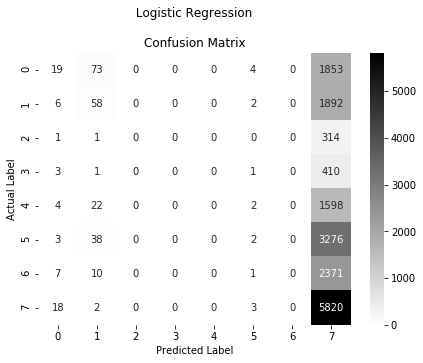

In [57]:
#Predict values based on new parameters
lr_pred_acc_test = lr.predict(x1_test)
lr_pred_acc_train= lr.predict(x1_train)

# New Model Evaluation metrics 
print('Training Accuracy Score : ' + str(accuracy_score(y1_train,lr_pred_acc_train)))
print('Testing Accuracy Score : ' + str(accuracy_score(y1_test,lr_pred_acc_test)))
print("\nClassification report: \n\n",classification_report(y1_test,lr_pred_acc_test))

#Logistic Regression (Grid Search) Confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y1_test,lr_pred_acc_test),annot=True,cmap=plt.cm.gray_r,fmt='g')
plt.title(" Logistic Regression \n\nConfusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# Logistic_Smote

In [87]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X1_SMOTE_train,y1_SMOTE_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Training Accuracy Score : 0.18391394381425352
Testing Accuracy Score : 0.18623594304528157

Classification report: 

               precision    recall  f1-score   support

           1       0.23      0.36      0.28      5871
           2       0.11      0.01      0.01      5905
           3       0.18      0.24      0.21      5769
           4       0.17      0.16      0.16      5841
           5       0.15      0.03      0.05      5902
           6       0.17      0.43      0.24      5969
           7       0.12      0.02      0.04      5863
           8       0.21      0.24      0.22      5654

    accuracy                           0.19     46774
   macro avg       0.17      0.19      0.15     46774
weighted avg       0.17      0.19      0.15     46774



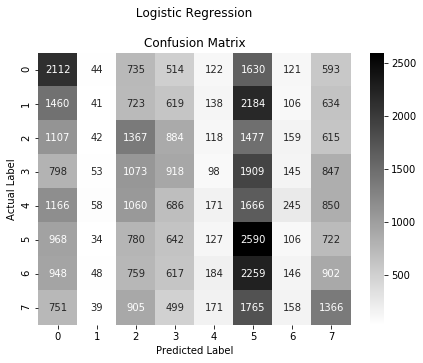

In [88]:
#Predict values based on new parameters
lr_pred_acc_test = lr.predict(X1_SMOTE_test)
lr_pred_acc_train= lr.predict(X1_SMOTE_train)

# New Model Evaluation metrics 
print('Training Accuracy Score : ' + str(accuracy_score(y1_SMOTE_train,lr_pred_acc_train)))
print('Testing Accuracy Score : ' + str(accuracy_score(y1_SMOTE_test,lr_pred_acc_test)))
print("\nClassification report: \n\n",classification_report(y1_SMOTE_test,lr_pred_acc_test))

#Logistic Regression (Grid Search) Confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y1_SMOTE_test,lr_pred_acc_test),annot=True,cmap=plt.cm.gray_r,fmt='g')
plt.title(" Logistic Regression \n\nConfusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 24)
knn.fit(x1_train,y1_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                     weights='uniform')

Training Accuracy Score : 0.34636481739883557
Testing Accuracy Score : 0.2776873421274207

Classification report: 

               precision    recall  f1-score   support

           1       0.11      0.03      0.04      1949
           2       0.09      0.03      0.04      1958
           3       0.00      0.00      0.00       316
           4       0.00      0.00      0.00       415
           5       0.11      0.02      0.03      1626
           6       0.17      0.16      0.17      3319
           7       0.13      0.05      0.07      2389
           8       0.33      0.71      0.45      5843

    accuracy                           0.28     17815
   macro avg       0.12      0.12      0.10     17815
weighted avg       0.19      0.28      0.20     17815



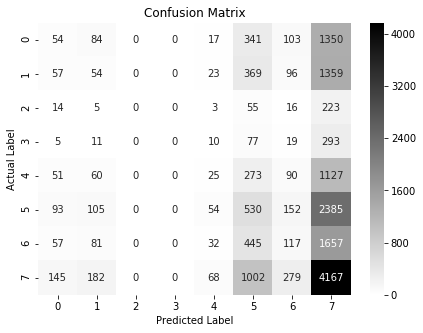

In [59]:
#Predict values based on new parameters
knn_pred_acc_test = knn.predict(x1_test)
knn_pred_acc_train= knn.predict(x1_train)

# New Model Evaluation metrics 
print('Training Accuracy Score : ' + str(accuracy_score(y1_train,knn_pred_acc_train)))
print('Testing Accuracy Score : ' + str(accuracy_score(y1_test,knn_pred_acc_test)))
print("\nClassification report: \n\n",classification_report(y1_test,knn_pred_acc_test))

#Logistic Regression (Grid Search) Confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y1_test,knn_pred_acc_test),annot=True,cmap=plt.cm.gray_r,fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# KNN_Smote

In [89]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 24)
knn.fit(X1_SMOTE_train,y1_SMOTE_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                     weights='uniform')

Training Accuracy Score : 0.4100313364730891
Testing Accuracy Score : 0.34493522042160174

Classification report: 

               precision    recall  f1-score   support

           1       0.32      0.39      0.35      5871
           2       0.31      0.34      0.32      5905
           3       0.41      0.63      0.49      5769
           4       0.41      0.61      0.49      5841
           5       0.33      0.34      0.34      5902
           6       0.27      0.16      0.20      5969
           7       0.32      0.25      0.28      5863
           8       0.20      0.05      0.09      5654

    accuracy                           0.34     46774
   macro avg       0.32      0.34      0.32     46774
weighted avg       0.32      0.34      0.32     46774



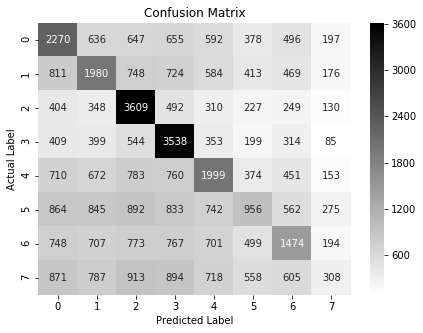

In [90]:
#Predict values based on new parameters
knn_pred_acc_test = knn.predict(X1_SMOTE_test)
knn_pred_acc_train= knn.predict(X1_SMOTE_train)

# New Model Evaluation metrics 
print('Training Accuracy Score : ' + str(accuracy_score(y1_SMOTE_train,knn_pred_acc_train)))
print('Testing Accuracy Score : ' + str(accuracy_score(y1_SMOTE_test,knn_pred_acc_test)))
print("\nClassification report: \n\n",classification_report(y1_SMOTE_test,knn_pred_acc_test))

#Logistic Regression (Grid Search) Confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y1_SMOTE_test,knn_pred_acc_test),annot=True,cmap=plt.cm.gray_r,fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# NAIVE BAYES

In [60]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, f1_score

In [61]:
model_mnb = MultinomialNB()
model_mnb.fit(x1_train,y1_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Training Accuracy Score : 0.21192801809170958
Testing Accuracy Score : 0.21223687903452146

Classification report: 

               precision    recall  f1-score   support

           1       0.18      0.11      0.14      1949
           2       0.14      0.26      0.18      1958
           3       0.02      0.20      0.04       316
           4       0.00      0.00      0.00       415
           5       0.11      0.02      0.04      1626
           6       0.20      0.21      0.21      3319
           7       0.16      0.01      0.01      2389
           8       0.39      0.38      0.39      5843

    accuracy                           0.21     17815
   macro avg       0.15      0.15      0.12     17815
weighted avg       0.23      0.21      0.21     17815



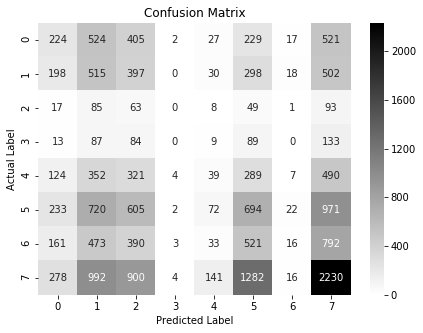

In [62]:
#Predict values based on new parameters
MNB_pred_acc_test = model_mnb.predict(x1_test)
MNB_pred_acc_train= model_mnb.predict(x1_train)

# New Model Evaluation metrics 
print('Training Accuracy Score : ' + str(accuracy_score(y1_train,MNB_pred_acc_train)))
print('Testing Accuracy Score : ' + str(accuracy_score(y1_test,MNB_pred_acc_test)))
print("\nClassification report: \n\n",classification_report(y1_test,MNB_pred_acc_test))

#Logistic Regression (Grid Search) Confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y1_test,MNB_pred_acc_test),annot=True,cmap=plt.cm.gray_r,fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# Naive Bayes Smote

In [91]:
model_mnb = MultinomialNB()
model_mnb.fit(X1_SMOTE_train,y1_SMOTE_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Training Accuracy Score : 0.1441019626527882
Testing Accuracy Score : 0.13967161243425835

Classification report: 

               precision    recall  f1-score   support

           1       0.20      0.12      0.15      5871
           2       0.13      0.03      0.05      5905
           3       0.14      0.39      0.21      5769
           4       0.13      0.15      0.14      5841
           5       0.19      0.01      0.01      5902
           6       0.06      0.00      0.00      5969
           7       0.16      0.02      0.03      5863
           8       0.13      0.43      0.20      5654

    accuracy                           0.14     46774
   macro avg       0.14      0.14      0.10     46774
weighted avg       0.14      0.14      0.10     46774



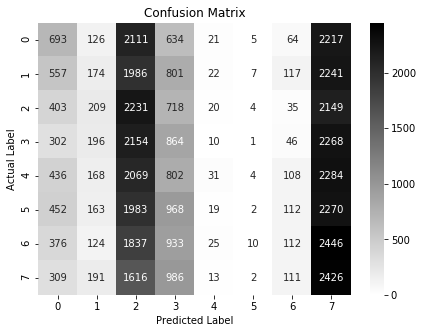

In [92]:
#Predict values based on new parameters
MNB_pred_acc_test = model_mnb.predict(X1_SMOTE_test)
MNB_pred_acc_train= model_mnb.predict(X1_SMOTE_train)

# New Model Evaluation metrics 
print('Training Accuracy Score : ' + str(accuracy_score(y1_SMOTE_train,MNB_pred_acc_train)))
print('Testing Accuracy Score : ' + str(accuracy_score(y1_SMOTE_test,MNB_pred_acc_test)))
print("\nClassification report: \n\n",classification_report(y1_SMOTE_test,MNB_pred_acc_test))

#Logistic Regression (Grid Search) Confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y1_SMOTE_test,MNB_pred_acc_test),annot=True,cmap=plt.cm.gray_r,fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# DECISION TREE

In [63]:

dt=DecisionTreeClassifier( criterion='entropy',random_state=2,max_depth=9)
dt.fit(x1_train,y1_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=2, splitter='best')

from sklearn.model_selection import GridSearchCV
parameter = {'max_depth':np.arange(1,50)}
GS = GridSearchCV(dt,parameter,cv=5)
GS.fit(x1,y1)
GS.best_params_

Training Accuracy Score : 0.5437376702112303
Testing Accuracy Score : 0.5055290485545888

Classification report: 

               precision    recall  f1-score   support

           1       0.32      0.09      0.14      1949
           2       0.39      0.19      0.25      1958
           3       0.21      0.05      0.09       316
           4       0.26      0.08      0.12       415
           5       0.51      0.46      0.49      1626
           6       0.39      0.51      0.44      3319
           7       0.40      0.37      0.39      2389
           8       0.63      0.87      0.73      5843

    accuracy                           0.51     17815
   macro avg       0.39      0.33      0.33     17815
weighted avg       0.47      0.51      0.47     17815



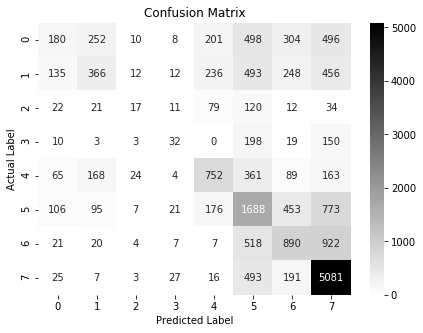

In [64]:
#Predict values based on new parameters
DT_pred_acc_test = dt.predict(x1_test)
DT_pred_acc_train= dt.predict(x1_train)

# New Model Evaluation metrics 
print('Training Accuracy Score : ' + str(accuracy_score(y1_train,DT_pred_acc_train)))
print('Testing Accuracy Score : ' + str(accuracy_score(y1_test,DT_pred_acc_test)))
print("\nClassification report: \n\n",classification_report(y1_test,DT_pred_acc_test))

#Logistic Regression (Grid Search) Confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y1_test,DT_pred_acc_test),annot=True,cmap=plt.cm.gray_r,fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# Decision Tree with SMOTE

In [93]:
dt=DecisionTreeClassifier( criterion='entropy',random_state=2,max_depth=9)
dt.fit(X1_SMOTE_train,y1_SMOTE_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=2, splitter='best')

Training Accuracy Score : 0.48805182429584565
Testing Accuracy Score : 0.4653439945268739

Classification report: 

               precision    recall  f1-score   support

           1       0.36      0.19      0.25      5871
           2       0.38      0.24      0.30      5905
           3       0.58      0.48      0.53      5769
           4       0.50      0.70      0.58      5841
           5       0.53      0.50      0.51      5902
           6       0.30      0.29      0.30      5969
           7       0.38      0.56      0.46      5863
           8       0.61      0.78      0.69      5654

    accuracy                           0.47     46774
   macro avg       0.46      0.47      0.45     46774
weighted avg       0.46      0.47      0.45     46774



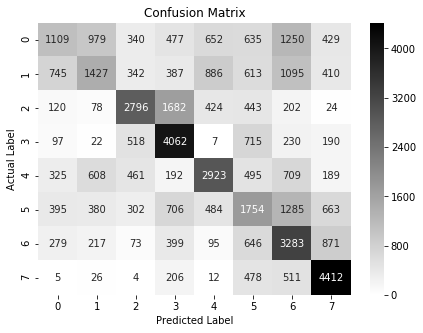

In [94]:
#Predict values based on new parameters
DT_pred_acc_test = dt.predict(X1_SMOTE_test)
DT_pred_acc_train= dt.predict(X1_SMOTE_train)

# New Model Evaluation metrics 
print('Training Accuracy Score : ' + str(accuracy_score(y1_SMOTE_train,DT_pred_acc_train)))
print('Testing Accuracy Score : ' + str(accuracy_score(y1_SMOTE_test,DT_pred_acc_test)))
print("\nClassification report: \n\n",classification_report(y1_SMOTE_test,DT_pred_acc_test))

#Logistic Regression (Grid Search) Confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y1_SMOTE_test,DT_pred_acc_test),annot=True,cmap=plt.cm.gray_r,fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# RANDOM FOREST

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf = RandomForestClassifier(n_estimators=51,criterion='entropy',random_state=2,max_depth=9)
rf.fit(x1_train,y1_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=51,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

Training Accuracy Score : 0.5467689938892364
Testing Accuracy Score : 0.4973337075498176

Classification report: 

               precision    recall  f1-score   support

           1       0.45      0.10      0.17      1949
           2       0.44      0.18      0.25      1958
           3       0.00      0.00      0.00       316
           4       0.00      0.00      0.00       415
           5       0.53      0.48      0.50      1626
           6       0.36      0.48      0.41      3319
           7       0.44      0.21      0.28      2389
           8       0.57      0.93      0.71      5843

    accuracy                           0.50     17815
   macro avg       0.35      0.30      0.29     17815
weighted avg       0.46      0.50      0.44     17815



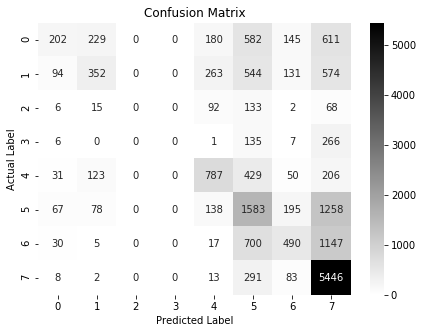

In [67]:
#Predict values based on new parameters
RF_pred_acc_test = rf.predict(x1_test)
RF_pred_acc_train= rf.predict(x1_train)

# New Model Evaluation metrics 
print('Training Accuracy Score : ' + str(accuracy_score(y1_train,RF_pred_acc_train)))
print('Testing Accuracy Score : ' + str(accuracy_score(y1_test,RF_pred_acc_test)))
print("\nClassification report: \n\n",classification_report(y1_test,RF_pred_acc_test))

#Logistic Regression (Grid Search) Confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y1_test,RF_pred_acc_test),annot=True,cmap=plt.cm.gray_r,fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# Random Forest Smothe

In [95]:
rf = RandomForestClassifier(n_estimators=51,criterion='entropy',random_state=2,max_depth=9)
rf.fit(X1_SMOTE_train,y1_SMOTE_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=51,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

Training Accuracy Score : 0.5302827612747164
Testing Accuracy Score : 0.4964937785949459

Classification report: 

               precision    recall  f1-score   support

           1       0.47      0.28      0.35      5871
           2       0.43      0.21      0.28      5905
           3       0.57      0.57      0.57      5769
           4       0.48      0.86      0.62      5841
           5       0.50      0.57      0.53      5902
           6       0.38      0.19      0.25      5969
           7       0.45      0.45      0.45      5863
           8       0.57      0.87      0.69      5654

    accuracy                           0.50     46774
   macro avg       0.48      0.50      0.47     46774
weighted avg       0.48      0.50      0.47     46774



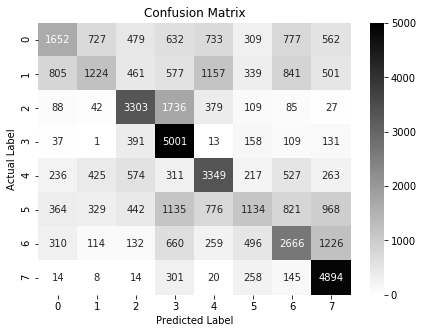

In [96]:
#Predict values based on new parameters
RF_pred_acc_test = rf.predict(X1_SMOTE_test)
RF_pred_acc_train= rf.predict(X1_SMOTE_train)

# New Model Evaluation metrics 
print('Training Accuracy Score : ' + str(accuracy_score(y1_SMOTE_train,RF_pred_acc_train)))
print('Testing Accuracy Score : ' + str(accuracy_score(y1_SMOTE_test,RF_pred_acc_test)))
print("\nClassification report: \n\n",classification_report(y1_SMOTE_test,RF_pred_acc_test))

#Logistic Regression (Grid Search) Confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y1_SMOTE_test,RF_pred_acc_test),annot=True,cmap=plt.cm.gray_r,fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# BOOSTING

# GradientBoostingClassifier WITH 8 RESPONSES

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score,recall_score,f1_score
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [136]:
from sklearn.ensemble import GradientBoostingClassifier

In [137]:
gb_model1=GradientBoostingClassifier(random_state=0,max_depth=5,learning_rate=0.02)
gb_model1.fit(x1_train,y1_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Training Accuracy Score : 0.5554058605591108
Testing Accuracy Score : 0.524277294414819

Classification report: 

               precision    recall  f1-score   support

           1       0.49      0.15      0.23      1949
           2       0.43      0.23      0.30      1958
           3       0.17      0.03      0.05       316
           4       0.20      0.03      0.06       415
           5       0.54      0.52      0.53      1626
           6       0.39      0.52      0.45      3319
           7       0.44      0.37      0.40      2389
           8       0.63      0.88      0.73      5843

    accuracy                           0.52     17815
   macro avg       0.41      0.34      0.34     17815
weighted avg       0.50      0.52      0.49     17815



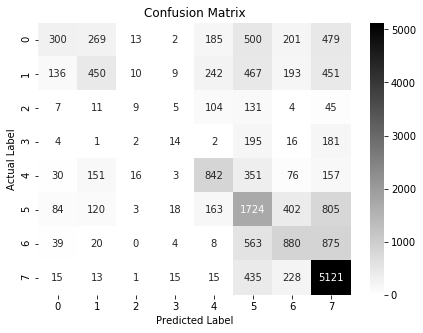

In [138]:
#Predict values based on new parameters
GB8_pred_acc_test = gb_model1.predict(x1_test)
GB8_pred_acc_train= gb_model1.predict(x1_train)

# New Model Evaluation metrics 
print('Training Accuracy Score : ' + str(accuracy_score(y1_train,GB8_pred_acc_train)))
print('Testing Accuracy Score : ' + str(accuracy_score(y1_test,GB8_pred_acc_test)))
print("\nClassification report: \n\n",classification_report(y1_test,GB8_pred_acc_test))

#Logistic Regression (Grid Search) Confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y1_test,GB8_pred_acc_test),annot=True,cmap=plt.cm.gray_r,fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# GradientBoostingClassifier WITH SMOTE 8 RESPONSES

In [149]:
gb_model=GradientBoostingClassifier(random_state=0,max_depth=5,learning_rate=0.02)
gb_model.fit(X1_SMOTE_train,y1_SMOTE_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Training Accuracy Score : 0.5384467371584599
Testing Accuracy Score : 0.5226194039423612

Classification report: 

               precision    recall  f1-score   support

           1       0.51      0.32      0.39      5871
           2       0.43      0.29      0.35      5905
           3       0.60      0.61      0.60      5769
           4       0.56      0.81      0.66      5841
           5       0.54      0.56      0.55      5902
           6       0.40      0.25      0.31      5969
           7       0.43      0.56      0.49      5863
           8       0.62      0.80      0.70      5654

    accuracy                           0.52     46774
   macro avg       0.51      0.53      0.51     46774
weighted avg       0.51      0.52      0.50     46774



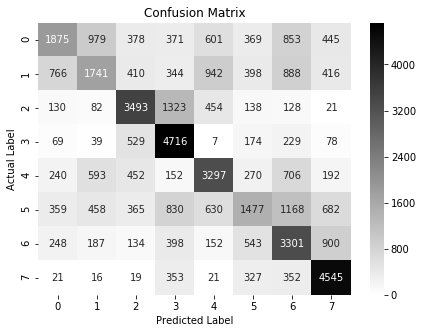

In [151]:
#Predict values based on new parameters
GB8_pred_acc_test = gb_model.predict(X1_SMOTE_test)
GB8_pred_acc_train= gb_model.predict(X1_SMOTE_train)

# New Model Evaluation metrics 
print('Training Accuracy Score : ' + str(accuracy_score(y1_SMOTE_train,GB8_pred_acc_train)))
print('Testing Accuracy Score : ' + str(accuracy_score(y1_SMOTE_test,GB8_pred_acc_test)))
print("\nClassification report: \n\n",classification_report(y1_SMOTE_test,GB8_pred_acc_test))

#Logistic Regression (Grid Search) Confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y1_SMOTE_test,GB8_pred_acc_test),annot=True,cmap=plt.cm.gray_r,fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# XG BOOST

# XG BOOST WITH 8 RESPONSES

In [207]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [208]:
# RidgeClassifier model with best parameters
XGBoost_model = XGBClassifier(alpha=0.1,random_state=28,learning_rate=0.09,max_depth=5,n_estimators=500)
XGBoost_model.fit(x1_train,y1_train)

XGBClassifier(alpha=0.1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.09, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=28,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Training Accuracy Score : 0.6807486888322186
Testing Accuracy Score : 0.5342127420712882

Classification report: 

               precision    recall  f1-score   support

           1       0.44      0.24      0.31      1949
           2       0.41      0.27      0.33      1958
           3       0.35      0.07      0.11       316
           4       0.28      0.15      0.19       415
           5       0.56      0.50      0.53      1626
           6       0.41      0.50      0.45      3319
           7       0.45      0.37      0.40      2389
           8       0.66      0.87      0.75      5843

    accuracy                           0.53     17815
   macro avg       0.44      0.37      0.38     17815
weighted avg       0.51      0.53      0.51     17815



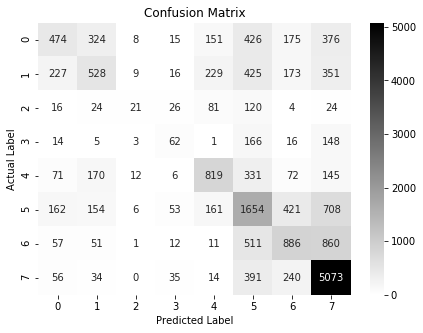

In [209]:
#Predict values based on new parameters
XGB8_pred_acc_test = XGBoost_model.predict(x1_test)
XGB8_pred_acc_train= XGBoost_model.predict(x1_train)

# New Model Evaluation metrics 
print('Training Accuracy Score : ' + str(accuracy_score(y1_train,XGB8_pred_acc_train)))
print('Testing Accuracy Score : ' + str(accuracy_score(y1_test,XGB8_pred_acc_test)))
print("\nClassification report: \n\n",classification_report(y1_test,XGB8_pred_acc_test))

#Logistic Regression (Grid Search) Confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y1_test,XGB8_pred_acc_test),annot=True,cmap=plt.cm.gray_r,fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [193]:
test=XGBoost_model.predict(df_test1)

In [195]:
test_df=pd.DataFrame()

In [196]:
test_df['Id']=df_test1['Id']

In [197]:
test_df['Response']=test

In [199]:
test_df.to_csv("Kaggle_test.csv")

# XGBoost_model WITH SMOTE 

# 1)

In [157]:
XGBoost_model1 = XGBClassifier(alpha=0.1,random_state=28,learning_rate=0.1,max_depth=5,n_estimators=500,
                            )
XGBoost_model1.fit(X1_SMOTE_train,y1_SMOTE_train)

XGBClassifier(alpha=0.1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=28,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Training Accuracy Score : 0.8100661547765214
Testing Accuracy Score : 0.668213109847351

Classification report: 

               precision    recall  f1-score   support

           1       0.65      0.54      0.59      5871
           2       0.61      0.48      0.53      5905
           3       0.84      0.89      0.87      5769
           4       0.81      0.92      0.86      5841
           5       0.68      0.65      0.67      5902
           6       0.48      0.40      0.44      5969
           7       0.56      0.62      0.59      5863
           8       0.66      0.86      0.74      5654

    accuracy                           0.67     46774
   macro avg       0.66      0.67      0.66     46774
weighted avg       0.66      0.67      0.66     46774



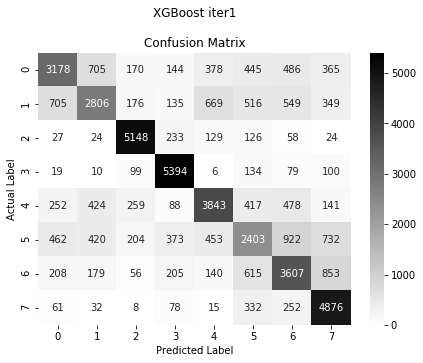

In [161]:
#Predict values based on new parameters
XGB8_pred_acc_test = XGBoost_model1.predict(X1_SMOTE_test)
XGB8_pred_acc_train= XGBoost_model1.predict(X1_SMOTE_train)

# New Model Evaluation metrics 
print('Training Accuracy Score : ' + str(accuracy_score(y1_SMOTE_train,XGB8_pred_acc_train)))
print('Testing Accuracy Score : ' + str(accuracy_score(y1_SMOTE_test,XGB8_pred_acc_test)))
print("\nClassification report: \n\n",classification_report(y1_SMOTE_test,XGB8_pred_acc_test))

#Logistic Regression (Grid Search) Confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y1_SMOTE_test,XGB8_pred_acc_test),annot=True,cmap=plt.cm.gray_r,fmt='g')
plt.title("XGBoost iter1\n\nConfusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# 2)

In [166]:
XGBoost_model2 = XGBClassifier(alpha=0.1,random_state=28,learning_rate=0.08888889999,max_depth=5,n_estimators=500,
                            )
XGBoost_model2.fit(X1_SMOTE_train,y1_SMOTE_train)

XGBClassifier(alpha=0.1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.085, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=28,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Training Accuracy Score : 0.7165148710806502
Testing Accuracy Score : 0.6294095010048317

Classification report: 

               precision    recall  f1-score   support

           1       0.61      0.49      0.54      5871
           2       0.54      0.41      0.47      5905
           3       0.78      0.82      0.80      5769
           4       0.74      0.89      0.81      5841
           5       0.65      0.61      0.63      5902
           6       0.46      0.37      0.41      5969
           7       0.53      0.60      0.57      5863
           8       0.65      0.86      0.74      5654

    accuracy                           0.63     46774
   macro avg       0.62      0.63      0.62     46774
weighted avg       0.62      0.63      0.62     46774



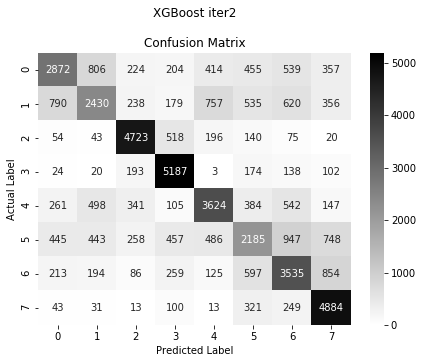

In [167]:
#Predict values based on new parameters
XGB8_pred_acc_test = XGBoost_model2.predict(X1_SMOTE_test)
XGB8_pred_acc_train= XGBoost_model2.predict(X1_SMOTE_train)

# New Model Evaluation metrics 
print('Training Accuracy Score : ' + str(accuracy_score(y1_SMOTE_train,XGB8_pred_acc_train)))
print('Testing Accuracy Score : ' + str(accuracy_score(y1_SMOTE_test,XGB8_pred_acc_test)))
print("\nClassification report: \n\n",classification_report(y1_SMOTE_test,XGB8_pred_acc_test))

#Logistic Regression (Grid Search) Confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y1_SMOTE_test,XGB8_pred_acc_test),annot=True,cmap=plt.cm.gray_r,fmt='g')
plt.title("XGBoost iter2\n\nConfusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# 3)

In [261]:
XGBoost_model3 = XGBClassifier(alpha=0.1,random_state=28,learning_rate=0.09,max_depth=5,n_estimators=500,
                            )
XGBoost_model3.fit(X1_SMOTE_train,y1_SMOTE_train)

XGBClassifier(alpha=0.1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.09, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=28,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Training Accuracy Score : 0.723322765672818
Testing Accuracy Score : 0.6348826271005259

Classification report: 

               precision    recall  f1-score   support

           1       0.60      0.50      0.54      5871
           2       0.57      0.43      0.49      5905
           3       0.79      0.82      0.81      5769
           4       0.75      0.89      0.81      5841
           5       0.65      0.61      0.63      5902
           6       0.45      0.37      0.41      5969
           7       0.54      0.60      0.57      5863
           8       0.65      0.86      0.74      5654

    accuracy                           0.63     46774
   macro avg       0.63      0.64      0.63     46774
weighted avg       0.63      0.63      0.62     46774



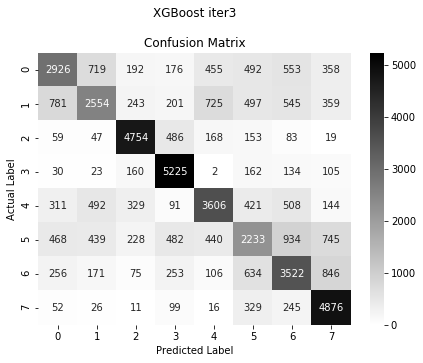

In [262]:
#Predict values based on new parameters
XGB8_pred_acc_test = XGBoost_model3.predict(X1_SMOTE_test)
XGB8_pred_acc_train= XGBoost_model3.predict(X1_SMOTE_train)

# New Model Evaluation metrics 
print('Training Accuracy Score : ' + str(accuracy_score(y1_SMOTE_train,XGB8_pred_acc_train)))
print('Testing Accuracy Score : ' + str(accuracy_score(y1_SMOTE_test,XGB8_pred_acc_test)))
print("\nClassification report: \n\n",classification_report(y1_SMOTE_test,XGB8_pred_acc_test))

#Logistic Regression (Grid Search) Confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y1_SMOTE_test,XGB8_pred_acc_test),annot=True,cmap=plt.cm.gray_r,fmt='g')
plt.title("XGBoost iter3\n\nConfusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [263]:
df_test1.head()

,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_5,Family_Hist_1,Ht,Id,Ins_Age,Insurance_History_1,...,Medical_Keyword_9,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Wt,Medical_Keyword
59381,0.472262,0.150,3,1,2,3,0.781818,1,0.611940,2,...,0,1,16,26,0.487179,2,3,1,0.338912,6
59382,0.484984,0.000,1,3,2,2,0.727273,3,0.626866,1,...,0,1,1,26,0.076923,2,3,1,0.311715,0
59383,0.519103,0.143,9,1,2,3,0.709091,4,0.582090,2,...,0,1,16,26,0.144667,2,3,1,0.320084,1
59384,0.486962,0.210,9,1,2,2,0.654545,9,0.522388,1,...,0,1,0,26,0.151709,2,1,1,0.267782,30
59385,0.428718,0.085,9,1,2,2,0.672727,12,0.298507,2,...,0,1,0,26,0.076923,2,3,1,0.246862,17


In [264]:
df_train1.head()

,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_5,Family_Hist_1,Ht,Id,Ins_Age,Insurance_History_1,...,Medical_Keyword_9,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Wt,Medical_Keyword
0,0.323008,0.028,12,1,3,2,0.581818,2,0.641791,1,...,0,1,16,10,0.076923,2,1,1,0.148536,0
1,0.272288,0.000,1,3,2,2,0.600000,5,0.059701,2,...,0,1,0,26,0.076923,2,3,1,0.131799,0
2,0.428780,0.030,9,1,2,3,0.745455,6,0.029851,2,...,0,1,18,26,0.076923,2,3,1,0.288703,0
3,0.352438,0.042,9,1,3,3,0.672727,7,0.164179,2,...,0,1,17,10,0.487179,2,3,1,0.205021,25
4,0.424046,0.027,9,1,2,2,0.654545,8,0.417910,2,...,0,1,15,26,0.230769,2,3,1,0.234310,0


In [265]:
test=XGBoost_model3.predict(df_test1)

In [266]:
test

array([1, 8, 6, ..., 6, 2, 6], dtype=int64)

In [267]:
kagg=pd.DataFrame()

In [268]:
kagg['Id']=df_test1['Id']
kagg['Response']=test

In [269]:
kagg.to_csv("Kaggle_Submission.csv")

# 4)

In [159]:
XGBoost_model4 = XGBClassifier(alpha=0.1,random_state=28,learning_rate=0.09,max_depth=5,n_estimators=500,
                            )

XGBoost_model4.fit(X1_SMOTE_train,y1_SMOTE_train)

XGBClassifier(alpha=0.1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.09, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=28,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Training Accuracy Score : 0.7940680606204988
Testing Accuracy Score : 0.662611707358789

Classification report: 

               precision    recall  f1-score   support

           1       0.65      0.53      0.58      5871
           2       0.60      0.46      0.52      5905
           3       0.83      0.88      0.86      5769
           4       0.80      0.92      0.85      5841
           5       0.68      0.65      0.66      5902
           6       0.48      0.40      0.44      5969
           7       0.56      0.61      0.59      5863
           8       0.66      0.86      0.75      5654

    accuracy                           0.66     46774
   macro avg       0.66      0.66      0.66     46774
weighted avg       0.65      0.66      0.65     46774



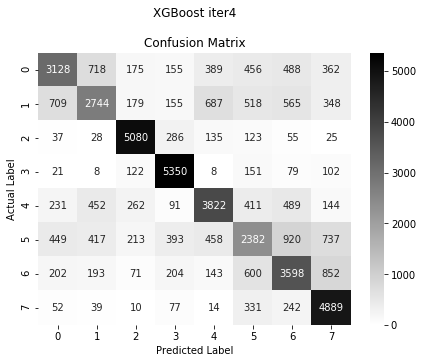

In [163]:
#Predict values based on new parameters
XGB8_pred_acc_test = XGBoost_model4.predict(X1_SMOTE_test)
XGB8_pred_acc_train= XGBoost_model4.predict(X1_SMOTE_train)

# New Model Evaluation metrics 
print('Training Accuracy Score : ' + str(accuracy_score(y1_SMOTE_train,XGB8_pred_acc_train)))
print('Testing Accuracy Score : ' + str(accuracy_score(y1_SMOTE_test,XGB8_pred_acc_test)))
print("\nClassification report: \n\n",classification_report(y1_SMOTE_test,XGB8_pred_acc_test))

#Logistic Regression (Grid Search) Confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y1_SMOTE_test,XGB8_pred_acc_test),annot=True,cmap=plt.cm.gray_r,fmt='g')
plt.title("XGBoost iter4\n\nConfusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# 5)

In [180]:
XGBoost_model5 = XGBClassifier(alpha=0.1,random_state=28,learning_rate=0.095,max_depth=6,n_estimators=500,
                            )
XGBoost_model5.fit(X1_SMOTE_train,y1_SMOTE_train)

XGBClassifier(alpha=0.1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.095, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=28,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Training Accuracy Score : 0.8029925415528963
Testing Accuracy Score : 0.6673793132937101

Classification report: 

               precision    recall  f1-score   support

           1       0.65      0.54      0.59      5871
           2       0.60      0.47      0.53      5905
           3       0.84      0.89      0.86      5769
           4       0.81      0.92      0.86      5841
           5       0.68      0.65      0.67      5902
           6       0.49      0.40      0.44      5969
           7       0.56      0.62      0.59      5863
           8       0.66      0.86      0.75      5654

    accuracy                           0.67     46774
   macro avg       0.66      0.67      0.66     46774
weighted avg       0.66      0.67      0.66     46774



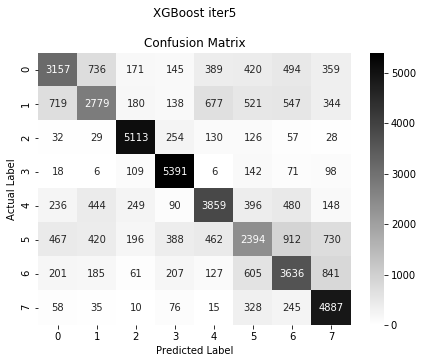

In [181]:
#Predict values based on new parameters
XGB8_pred_acc_test = XGBoost_model5.predict(X1_SMOTE_test)
XGB8_pred_acc_train= XGBoost_model5.predict(X1_SMOTE_train)

# New Model Evaluation metrics 
print('Training Accuracy Score : ' + str(accuracy_score(y1_SMOTE_train,XGB8_pred_acc_train)))
print('Testing Accuracy Score : ' + str(accuracy_score(y1_SMOTE_test,XGB8_pred_acc_test)))
print("\nClassification report: \n\n",classification_report(y1_SMOTE_test,XGB8_pred_acc_test))

#Logistic Regression (Grid Search) Confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y1_SMOTE_test,XGB8_pred_acc_test),annot=True,cmap=plt.cm.gray_r,fmt='g')
plt.title("XGBoost iter5\n\nConfusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# XGBoost_model WITH RUS

In [170]:
XGBoost_model_RUS = XGBClassifier(alpha=0.1,random_state=28,learning_rate=0.1,max_depth=6,n_estimators=500,
                            )
XGBoost_model_RUS.fit(X1_RUS_train,y1_RUS_train)

XGBClassifier(alpha=0.1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=28,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Training Accuracy Score : 0.9994710860366713
Testing Accuracy Score : 0.4136513157894737

Classification report: 

               precision    recall  f1-score   support

           1       0.30      0.26      0.28       289
           2       0.29      0.21      0.25       298
           3       0.44      0.44      0.44       297
           4       0.47      0.57      0.51       316
           5       0.53      0.49      0.51       305
           6       0.28      0.25      0.26       305
           7       0.40      0.37      0.38       298
           8       0.51      0.67      0.58       324

    accuracy                           0.41      2432
   macro avg       0.40      0.41      0.40      2432
weighted avg       0.40      0.41      0.40      2432



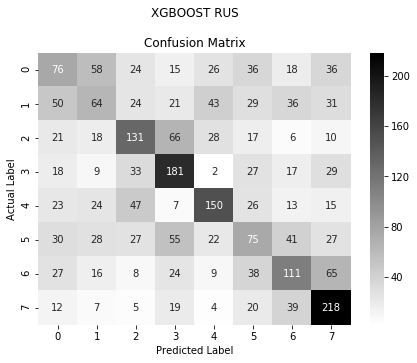

In [171]:
#Predict values based on new parameters
XGB8_pred_acc_test = XGBoost_model_RUS.predict(X1_RUS_test)
XGB8_pred_acc_train= XGBoost_model_RUS.predict(X1_RUS_train)

# New Model Evaluation metrics 
print('Training Accuracy Score : ' + str(accuracy_score(y1_RUS_train,XGB8_pred_acc_train)))
print('Testing Accuracy Score : ' + str(accuracy_score(y1_RUS_test,XGB8_pred_acc_test)))
print("\nClassification report: \n\n",classification_report(y1_RUS_test,XGB8_pred_acc_test))

#Logistic Regression (Grid Search) Confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y1_RUS_test,XGB8_pred_acc_test),annot=True,cmap=plt.cm.gray_r,fmt='g')
plt.title("XGBOOST RUS\n\nConfusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [172]:
XGBoost_model_RUS2 = XGBClassifier(alpha=0.1,random_state=28,learning_rate=0.1,max_depth=5,n_estimators=500,
                            )
XGBoost_model_RUS2.fit(X1_RUS_train,y1_RUS_train)

XGBClassifier(alpha=0.1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=28,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Training Accuracy Score : 0.9754936530324401
Testing Accuracy Score : 0.4173519736842105

Classification report: 

               precision    recall  f1-score   support

           1       0.33      0.27      0.30       289
           2       0.30      0.24      0.27       298
           3       0.44      0.44      0.44       297
           4       0.48      0.61      0.54       316
           5       0.54      0.50      0.52       305
           6       0.28      0.21      0.24       305
           7       0.37      0.36      0.37       298
           8       0.49      0.67      0.56       324

    accuracy                           0.42      2432
   macro avg       0.40      0.41      0.40      2432
weighted avg       0.40      0.42      0.41      2432



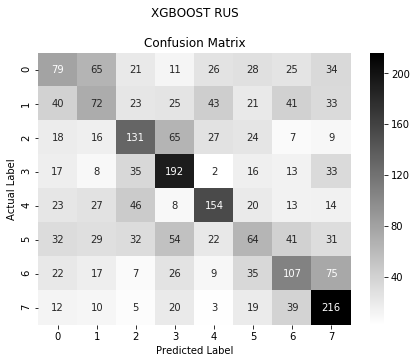

In [173]:
#Predict values based on new parameters
XGB8_pred_acc_test = XGBoost_model_RUS2.predict(X1_RUS_test)
XGB8_pred_acc_train= XGBoost_model_RUS2.predict(X1_RUS_train)

# New Model Evaluation metrics 
print('Training Accuracy Score : ' + str(accuracy_score(y1_RUS_train,XGB8_pred_acc_train)))
print('Testing Accuracy Score : ' + str(accuracy_score(y1_RUS_test,XGB8_pred_acc_test)))
print("\nClassification report: \n\n",classification_report(y1_RUS_test,XGB8_pred_acc_test))

#Logistic Regression (Grid Search) Confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y1_RUS_test,XGB8_pred_acc_test),annot=True,cmap=plt.cm.gray_r,fmt='g')
plt.title("XGBOOST RUS\n\nConfusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# RidgeClassifier

In [174]:
from sklearn.linear_model import RidgeClassifier

In [175]:
# RidgeClassifier model with best parameters
Ridge_model = RidgeClassifier(alpha=0.1,random_state=28)
Ridge_model.fit(x1_train,y1_train)

RidgeClassifier(alpha=0.1, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=28, solver='auto',
                tol=0.001)

Training Accuracy Score : 0.4471924168791801
Testing Accuracy Score : 0.4400785854616896

Classification report: 

               precision    recall  f1-score   support

           1       0.41      0.21      0.28      1949
           2       0.33      0.17      0.23      1958
           3       0.00      0.00      0.00       316
           4       0.00      0.00      0.00       415
           5       0.35      0.13      0.19      1626
           6       0.33      0.35      0.34      3319
           7       0.31      0.13      0.18      2389
           8       0.50      0.93      0.65      5843

    accuracy                           0.44     17815
   macro avg       0.28      0.24      0.23     17815
weighted avg       0.38      0.44      0.37     17815



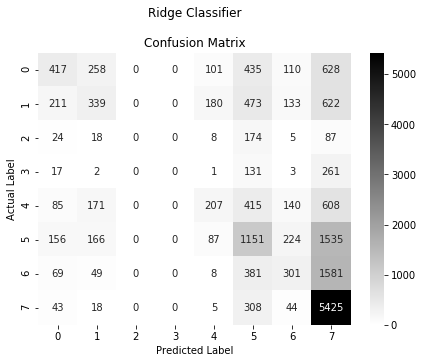

In [177]:
#Predict values based on new parameters
Ridge_pred_acc_test = Ridge_model.predict(x1_test)
Ridge_pred_acc_train= Ridge_model.predict(x1_train)

# New Model Evaluation metrics 
print('Training Accuracy Score : ' + str(accuracy_score(y1_train,Ridge_pred_acc_train)))
print('Testing Accuracy Score : ' + str(accuracy_score(y1_test,Ridge_pred_acc_test)))
print("\nClassification report: \n\n",classification_report(y1_test,Ridge_pred_acc_test))

#Logistic Regression (Grid Search) Confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y1_test,Ridge_pred_acc_test),annot=True,cmap=plt.cm.gray_r,fmt='g')
plt.title("Ridge Classifier\n\nConfusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# Ridge Classifer with smote

In [178]:
 # RidgeClassifier model with best parameters
Ridge_model = RidgeClassifier(alpha=0.1,random_state=28)
Ridge_model.fit(X1_SMOTE_train,y1_SMOTE_train)

RidgeClassifier(alpha=0.1, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=28, solver='auto',
                tol=0.001)

Training Accuracy Score : 0.41956971907126756
Testing Accuracy Score : 0.4187796639158507

Classification report: 

               precision    recall  f1-score   support

           1       0.41      0.38      0.39      5871
           2       0.36      0.21      0.27      5905
           3       0.43      0.57      0.49      5769
           4       0.43      0.73      0.54      5841
           5       0.42      0.38      0.40      5902
           6       0.34      0.04      0.08      5969
           7       0.42      0.30      0.35      5863
           8       0.42      0.75      0.54      5654

    accuracy                           0.42     46774
   macro avg       0.41      0.42      0.38     46774
weighted avg       0.40      0.42      0.38     46774



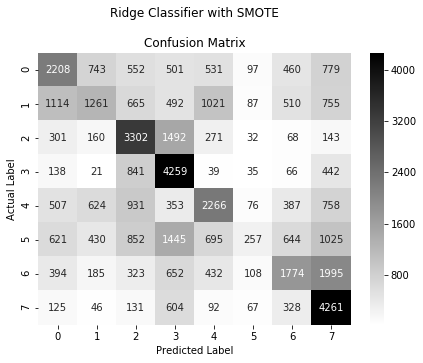

In [179]:
#Predict values based on new parameters
Ridge_pred_acc_test = Ridge_model.predict(X1_SMOTE_test)
Ridge_pred_acc_train= Ridge_model.predict(X1_SMOTE_train)

# New Model Evaluation metrics 
print('Training Accuracy Score : ' + str(accuracy_score(y1_SMOTE_train,Ridge_pred_acc_train)))
print('Testing Accuracy Score : ' + str(accuracy_score(y1_SMOTE_test,Ridge_pred_acc_test)))
print("\nClassification report: \n\n",classification_report(y1_SMOTE_test,Ridge_pred_acc_test))

#Logistic Regression (Grid Search) Confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y1_SMOTE_test,Ridge_pred_acc_test),annot=True,cmap=plt.cm.gray_r,fmt='g')
plt.title("Ridge Classifier with SMOTE\n\nConfusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# XGBoost with Regression

In [97]:
import numpy as np 

def confusion_matrix(rater_a, rater_b, min_rating=None, max_rating=None):
    """
    Returns the confusion matrix between rater's ratings
    """
    assert(len(rater_a) == len(rater_b))
    if min_rating is None:
        min_rating = min(rater_a + rater_b)
    if max_rating is None:
        max_rating = max(rater_a + rater_b)
    num_ratings = int(max_rating - min_rating + 1)
    conf_mat = [[0 for i in range(num_ratings)]
                for j in range(num_ratings)]
    for a, b in zip(rater_a, rater_b):
        conf_mat[a - min_rating][b - min_rating] += 1
    return conf_mat


def histogram(ratings, min_rating=None, max_rating=None):
    """
    Returns the counts of each type of rating that a rater made
    """
    if min_rating is None:
        min_rating = min(ratings)
    if max_rating is None:
        max_rating = max(ratings)
    num_ratings = int(max_rating - min_rating + 1)
    hist_ratings = [0 for x in range(num_ratings)]
    for r in ratings:
        hist_ratings[r - min_rating] += 1
    return hist_ratings


def quadratic_weighted_kappa(rater_a, rater_b, min_rating=None, max_rating=None):

    rater_a = np.array(rater_a, dtype=int)
    rater_b = np.array(rater_b, dtype=int)
    assert(len(rater_a) == len(rater_b))
    if min_rating is None:
        min_rating = min(min(rater_a), min(rater_b))
    if max_rating is None:
        max_rating = max(max(rater_a), max(rater_b))
    conf_mat = confusion_matrix(rater_a, rater_b,
                                min_rating, max_rating)
    num_ratings = len(conf_mat)
    num_scored_items = float(len(rater_a))

    hist_rater_a = histogram(rater_a, min_rating, max_rating)
    hist_rater_b = histogram(rater_b, min_rating, max_rating)

    numerator = 0.0
    denominator = 0.0

    for i in range(num_ratings):
        for j in range(num_ratings):
            expected_count = (hist_rater_a[i] * hist_rater_b[j]
                              / num_scored_items)
            d = pow(i - j, 2.0) / pow(num_ratings - 1, 2.0)
            numerator += d * conf_mat[i][j] / num_scored_items
            denominator += d * expected_count / num_scored_items

    return 1.0 - numerator / denominator



In [112]:
# preparing the data for modeling  
X_train = x1_train
X_test = x1_test
y_train=y1_train
y_test=y1_test

In [113]:
import xgboost as xgb
from scipy.optimize import fmin_powell

def get_offset(preds, y):
    round_preds = np.round(preds)
    off_sets = []
    y_ = y.values
    for j in range(8):
        print(j)
        y_1 = preds[round_preds == j+1]
        y_2 = y_[round_preds == j+1]
        p = get_qwk(0,y_1, y_2)
        min_x = 0 
        for x in np.arange(-3,3,0.01):
            if get_qwk(x,y_1, y_2) > p:
                p = get_qwk(x,y_1,y_2)
                min_x = x 
        off_sets.append(np.round(min_x,3))
        print('the class with risk ' + str(j + 1) + ' get the offset' + str(np.round(min_x,3)))

    return off_sets


def get_qwk(x, y_1, y_2):
    y_1_new = np.clip(np.round(y_1+x),1,8)
    diff = np.round(y_1_new) - y_2 
    quratic_diff = diff**2
    quadratic_weighted_kappa_value = (len(y_1) - sum(quratic_diff)/49)/len(y_1)   
    return quadratic_weighted_kappa_value

def add_offset_to_prediction(preds, off_sets): 
    preds = np.clip(preds,1,8)
    round_preds = np.clip(np.round(preds),1,8)
    for j in range(8):
        offset = off_sets[j]
        preds[round_preds == j+1] = preds[round_preds == j+1] + offset
    return np.clip( np.round(preds),1,8 )

def get_params():

    """
    eta:  actually shrinks the feature weights afte each iteration of boosting,
     to make the boosting process more conservative
    objective: I tried linear regression and poisson regression, poission is better. 
    min_child_weight: minimum sum of instance weight needed in a child

    """
    params = {}
    params["objective"] = "count:poisson"     
    params["eta"] = 0.06
    params["min_child_weight"] = 80
    params["subsample"] = 0.85
    params["colsample_bytree"] = 0.30
    params["max_depth"] = 9
    plst = list(params.items())
    return plst




def make_trails():
    model = create_model()
    preds = model.predict(xgb.DMatrix(X_train.values))
    preds = np.clip(preds,1,8)
    quadratic_weighted_kappa(np.round(preds), y_train.values)

    off_sets = get_offset(preds, y_train)

    preds_train = model.predict(xgb.DMatrix(X_train.values))
    new_preds_train = add_offset_to_prediction(preds_train, off_sets )

    preds_test = model.predict(xgb.DMatrix(X_test.values))
    new_preds = add_offset_to_prediction(preds_test, off_sets)

    return [quadratic_weighted_kappa(np.clip(np.round(preds_test),1,8), y_test), quadratic_weighted_kappa(new_preds, y_test)]

def create_model():
    xgtrain = xgb.DMatrix(X_train.values, y_train.values)
    plst = get_params()
    xgb_num_rounds = 500
    model = xgb.train(plst, xgtrain, xgb_num_rounds)
    return model



eta_list = []
result_list = []
for eta in np.arange(0.05,0.15,0.01):
    print(eta)
    eta_list.append(eta)
    result_list.append(make_trails())
# using posssion regression with max length = 12, result 0.6148 vs 0.6464
# using posssion regression with max length = 12, result 0.6183 vs 0.6458
# using posssion regression with max length = 9, result 0.6159 vs 0.6478



0.05
0
the class with risk 1 get the offset0
1
the class with risk 2 get the offset-0.34
2
the class with risk 3 get the offset-1.01
3
the class with risk 4 get the offset-0.45
4
the class with risk 5 get the offset-0.07
5
the class with risk 6 get the offset0.24
6
the class with risk 7 get the offset0.29
7
the class with risk 8 get the offset0
0.060000000000000005
0
the class with risk 1 get the offset0
1
the class with risk 2 get the offset-0.34
2
the class with risk 3 get the offset-1.01
3
the class with risk 4 get the offset-0.45
4
the class with risk 5 get the offset-0.07
5
the class with risk 6 get the offset0.24
6
the class with risk 7 get the offset0.29
7
the class with risk 8 get the offset0
0.07
0
the class with risk 1 get the offset0
1
the class with risk 2 get the offset-0.34
2
the class with risk 3 get the offset-1.01
3
the class with risk 4 get the offset-0.45
4
the class with risk 5 get the offset-0.07
5
the class with risk 6 get the offset0.24
6
the class with risk 7 ge

In [116]:
# the result for submitting. 

model = create_model()
preds = model.predict(xgb.DMatrix(X_train.values))
preds = np.clip(preds,1,8)

off_sets = get_offset(preds, y_train)



preds_train = model.predict(xgb.DMatrix(X_train.values))
new_preds_train = add_offset_to_prediction(preds_train, off_sets )



0
the class with risk 1 get the offset0
1
the class with risk 2 get the offset-0.34
2
the class with risk 3 get the offset-1.01
3
the class with risk 4 get the offset-0.45
4
the class with risk 5 get the offset-0.07
5
the class with risk 6 get the offset0.24
6
the class with risk 7 get the offset0.29
7
the class with risk 8 get the offset0
0.6956525545532768
0.7652084527033167


In [123]:
# the new metrics with offsets
print("********XGBoost with Regression***********\n")
print("Training Accuracy : ",quadratic_weighted_kappa(new_preds_train, y_train.values))
print("Testing Accuracy : ",quadratic_weighted_kappa(preds_train, y_train.values))


********XGBoost with Regression***********

Training Accuracy :  0.7652084527033167
Testing Accuracy :  0.6956525545532768


In [125]:
preds_test = model.predict(xgb.DMatrix(df_test1.values))
new_preds = add_offset_to_prediction(preds_test, off_sets)

In [128]:
new_preds.shape

(19765,)

In [130]:
test=pd.DataFrame()

In [137]:
test['Id']=df_test1['Id'].astype("int32")
test['Response']=new_preds.astype('int32')

In [138]:
test.shape

(19765, 2)

In [139]:
test.to_csv("Kaggle_Submission.csv",index=False)

# XGBoost with Regression (SMOTE)

In [141]:
# preparing the data for modeling  
X_train = X1_SMOTE_train
X_test = X1_SMOTE_test
y_train=y1_SMOTE_train
y_test=y1_SMOTE_test

In [143]:
import xgboost as xgb
from scipy.optimize import fmin_powell

def get_offset(preds, y):
    round_preds = np.round(preds)
    off_sets = []
    y_ = y.values
    for j in range(8):
        print(j)
        y_1 = preds[round_preds == j+1]
        y_2 = y_[round_preds == j+1]
        p = get_qwk(0,y_1, y_2)
        min_x = 0 
        for x in np.arange(-3,3,0.01):
            if get_qwk(x,y_1, y_2) > p:
                p = get_qwk(x,y_1,y_2)
                min_x = x 
        off_sets.append(np.round(min_x,3))
        print('the class with risk ' + str(j + 1) + ' get the offset' + str(np.round(min_x,3)))

    return off_sets


def get_qwk(x, y_1, y_2):
    y_1_new = np.clip(np.round(y_1+x),1,8)
    diff = np.round(y_1_new) - y_2 
    quratic_diff = diff**2
    quadratic_weighted_kappa_value = (len(y_1) - sum(quratic_diff)/49)/len(y_1)   
    return quadratic_weighted_kappa_value

def add_offset_to_prediction(preds, off_sets): 
    preds = np.clip(preds,1,8)
    round_preds = np.clip(np.round(preds),1,8)
    for j in range(8):
        offset = off_sets[j]
        preds[round_preds == j+1] = preds[round_preds == j+1] + offset
    return np.clip( np.round(preds),1,8 )

def get_params():

    """
    eta:  actually shrinks the feature weights afte each iteration of boosting,
     to make the boosting process more conservative
    objective: I tried linear regression and poisson regression, poission is better. 
    min_child_weight: minimum sum of instance weight needed in a child

    """
    params = {}
    params["objective"] = "count:poisson"     
    params["eta"] = 0.06
    params["min_child_weight"] = 80
    params["subsample"] = 0.85
    params["colsample_bytree"] = 0.30
    params["max_depth"] = 9
    plst = list(params.items())
    return plst




def make_trails():
    model = create_model()
    preds = model.predict(xgb.DMatrix(X_train.values))
    preds = np.clip(preds,1,8)
    quadratic_weighted_kappa(np.round(preds), y_train.values)

    off_sets = get_offset(preds, y_train)

    preds_train = model.predict(xgb.DMatrix(X_train.values))
    new_preds_train = add_offset_to_prediction(preds_train, off_sets )

    preds_test = model.predict(xgb.DMatrix(X_test.values))
    new_preds = add_offset_to_prediction(preds_test, off_sets)

    return [quadratic_weighted_kappa(np.clip(np.round(preds_test),1,8), y_test), quadratic_weighted_kappa(new_preds, y_test)]

def create_model():
    xgtrain = xgb.DMatrix(X_train.values, y_train.values)
    plst = get_params()
    xgb_num_rounds = 500
    model = xgb.train(plst, xgtrain, xgb_num_rounds)
    return model



eta_list = []
result_list = []
for eta in np.arange(0.05,0.15,0.01):
    print(eta)
    eta_list.append(eta)
    result_list.append(make_trails())
# using posssion regression with max length = 12, result 0.6148 vs 0.6464
# using posssion regression with max length = 12, result 0.6183 vs 0.6458
# using posssion regression with max length = 9, result 0.6159 vs 0.6478



0.05


TypeError: only integer scalar arrays can be converted to a scalar index

In [142]:
# the result for submitting. 

model = create_model()
preds = model.predict(xgb.DMatrix(X_train.values))
preds = np.clip(preds,1,8)

off_sets = get_offset(preds, y_train)



preds_train = model.predict(xgb.DMatrix(X_train.values))
new_preds_train = add_offset_to_prediction(preds_train, off_sets )


0


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
# the new metrics with offsets
print("********XGBoost with Regression (SMOTE)***********\n")
print("Training Accuracy : ",quadratic_weighted_kappa(new_preds_train, y_train.values))
print("Testing Accuracy : ",quadratic_weighted_kappa(preds_train, y_train.values))
